# Imports

In [2]:
# %pip uninstall -y pytesseract

In [34]:
# %pip install -r requirements.txt

In [4]:
%pip install -q -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


## Lib imports

In [35]:
import matplotlib.pyplot as plt
from icecream import ic
import seaborn as sns
import pandas as pd

import platform
import os

## Methods imports

In [6]:
from main_methods import (
    get_pdf_info,
    extract_and_measure_timing,
)

## PDF Extraction Methods
from extraction_methods.pymupdf4llm import get_pymupdf4llm
from extraction_methods.unstructured import (
    get_unstructured_auto,
    get_unstructured_fast,
    get_unstructured_hires,
    get_unstructured_ocr,
)

# Functions

## OS and other tools

In [7]:
def get_path_of_all_files_in_subfolders_with_extension_in_list(
    folder_path: str, extensions: list[str], ignore_folders: list[str] = []
) -> list:
    all_files = []
    for root, dirs, files in os.walk(folder_path):
        # print('root', root)
        # print('dirs', dirs)
        # print('files', files)
        if any([(os.sep + ignore_folder) in root for ignore_folder in ignore_folders]):
            continue
        # if root.__contains__(r"\outputs"):
        #     continue

        for file in files:
            for extension in extensions:
                if file.lower().endswith(extension) and not file.startswith("."):
                    all_files.append(os.path.join(root, file))
    return all_files


In [44]:
def check_if_each_parent_folders_exists_and_if_not_create_it(folder_path: str):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    return folder_path

# Main run

In [8]:
pdf_list = get_path_of_all_files_in_subfolders_with_extension_in_list(
    "sources_pdf", [".pdf"], ["outputs"]
)
print(f"Found {len(pdf_list)} pdf files")

Found 62 pdf files


In [51]:
## Get the hash of the name of the host machine
host_name = hash(platform.node())

In [ ]:
# Create a dataframe to store the data and timing of processing the pdf files
df_pdf_processing = pd.DataFrame(
    columns=[
        "pdf_path",
        "pdf_name",
        "pages_length",
        "file_size",
        "method",
        "output_md",
        "time_processing",
        "compute_identifier",
    ]
)

In [16]:
### Define methods list to be used
methods_list = [
    get_pymupdf4llm,
    # get_unstructured_auto,
    get_unstructured_fast,
    get_unstructured_hires,
    # get_unstructured_ocr,
]

In [ ]:
import pytesseract

pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

In [ ]:
# for pdf_path in pdf_list[:3]:
for pdf_path in pdf_list:
    pdf_name = os.path.basename(pdf_path)
    ic(f"Processing {pdf_name}")
    file_info = get_pdf_info(pdf_path)
    file_length = file_info["pages"]

    file_size = os.path.getsize(pdf_path) / 1024 / 1024

    for method in methods_list:
        ic(method.__name__)  # Print the method name
        # Extract and measure the time of the method
        output = extract_and_measure_timing(
            method,
            pdf_path=pdf_path,
            # bool_write_images=False,
            # bool_embed_images=False,
        )
        # Append the data to the dataframe
        df_pdf_processing.loc[len(df_pdf_processing)] = [
            pdf_path,
            pdf_name,
            file_length,
            file_size,
            method.__name__,
            output[0],
            output[1],
            host_name,
        ]

ic| f"Processing {pdf_path}": ('Processing sources_pdf\\Documentation Ecoskills '
                               'RH\\etude-transition-écologique Secteur du commerce (pas RH).pdf')
ic| method.__name__: 'get_pymupdf4llm'
ic| method.__name__: 'get_unstructured_fast'
ic| method.__name__: 'get_unstructured_hires'
The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/115M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

ic| f"Processing {pdf_path}": ('Processing sources_pdf\\Documentation Ecoskills RH\\Littérature pour les '
                               'modèles\\le-developpement-de-la-gestion-durable-des-ressources-humaines-un-eclairage-par-les-outils-de-pilotage-des-performances.pdf')
ic| method.__name__: 'get_pymupdf4llm'
ic| method.__name__: 'get_unstructured_fast'
ic| method.__name__: 'get_unstructured_hires'
ic| f"Processing {pdf_path}": ('Processing sources_pdf\\Documentation Ecoskills RH\\Littérature pour les '
                               'modèles\\Littérature académique\\2000gollan038.pdf')
ic| method.__name__: 'get_pymupdf4llm'
ic| method.__name__: 'get_unstructured_fast'
ic| method.__name__: 'get_unstructured_hires'
ic| f"Processing {pdf_path}": ('Processing sources_pdf\\Documentation Ecoskills RH\\Littérature pour les '
                               'modèles\\Littérature académique\\admsci-11-00048.pdf')
ic| method.__name__: 'get_pymupdf4llm'
ic| method.__name__: 'get_unstructured_fa

PDFPageCountError: Unable to get page count.
I/O Error: Couldn't open file 'sources_pdf\Documentation Ecoskills RH\Litt<c3><a9>rature pour les mod<c3><a8>les\Litt<c3><a9>rature acad<c3><a9>mique\Human Resource Management - 2023 - Ren - Advancing the sustainability agenda through strategic human resource management .pdf': No error.


In [ ]:
df_pdf_processing.shape

(35, 6)

In [ ]:
df_pdf_processing.head(2)

,pdf_path,pdf_name,pages_length,file_size,method,output_md,time_processing,compute_identifier
0,sources_pdf\Documentation Ecoskills RH\etude-t...,etude-transition-écologique Secteur du commerc...,103,14.742152,get_unstructured_ocr,"[| |, Liberté + Egalité + Fraternité REPUBLIQU...",483.589669,-5561349462465552372
1,sources_pdf\Documentation Ecoskills RH\Littéra...,le-developpement-de-la-gestion-durable-des-res...,22,0.219145,get_unstructured_ocr,[LE DEVELOPPEMENT DE LA GESTION DURABLE DES RE...,103.648610,-5561349462465552372
2,sources_pdf\Documentation Ecoskills RH\Littéra...,2000gollan038.pdf,21,0.078189,get_unstructured_ocr,"[HUMAN RESOURCES, CAPABILITIES, AND SUSTAINABI...",77.101861,-5561349462465552372
3,sources_pdf\Documentation Ecoskills RH\etude-t...,etude-transition-écologique Secteur du commerc...,103,14.742152,get_pymupdf4llm,"[{'metadata': {'format': 'PDF 1.5', 'title': '...",26.068919,-5561349462465552372
4,sources_pdf\Documentation Ecoskills RH\etude-t...,etude-transition-écologique Secteur du commerc...,103,14.742152,get_unstructured_fast,[],0.002999,-5561349462465552372


## TODO : Store the output of each methods

In [ ]:
## Force an object to a string


In [ ]:
## For each row, export the output to a markdown file in the outputs folder : extracted_outputs\methods_outputs
current_folder = os.getcwd()
for index, row in df_pdf_processing.iterrows():
    output_folder_name = row["pdf_name"].replace(".pdf", "")
    row_folder = os.path.join(
        current_folder, "extracted_outputs", "methods_outputs", output_folder_name
    )
    row_folder_checked = check_if_each_parent_folders_exists_and_if_not_create_it(
        row_folder
    )
    row_output_file_path = os.path.join(row_folder_checked, row["method"] + ".md")

    with open(row_output_file_path, "w") as text_file:
        ic(row["pdf_name"])
        try:
            text_file.write(str(row["output_md"]))
        except Exception as e:
            ic(e.__context__)
        #     ic(type(row["output_md"]))
        #     # ic(row["output_md"])


ic| row["pdf_name"]: 'etude-transition-écologique Secteur du commerce (pas RH).pdf'
ic| row["pdf_name"]: 'le-developpement-de-la-gestion-durable-des-ressources-humaines-un-eclairage-par-les-outils-de-pilotage-des-performances.pdf'
ic| row["pdf_name"]: '2000gollan038.pdf'
ic| row["pdf_name"]: 'etude-transition-écologique Secteur du commerce (pas RH).pdf'
ic| row["pdf_name"]: 'etude-transition-écologique Secteur du commerce (pas RH).pdf'
ic| row["pdf_name"]: 'etude-transition-écologique Secteur du commerce (pas RH).pdf'
ic| row["pdf_name"]: 'le-developpement-de-la-gestion-durable-des-ressources-humaines-un-eclairage-par-les-outils-de-pilotage-des-performances.pdf'
ic| row["pdf_name"]: 'le-developpement-de-la-gestion-durable-des-ressources-humaines-un-eclairage-par-les-outils-de-pilotage-des-performances.pdf'
ic| row["pdf_name"]: 'le-developpement-de-la-gestion-durable-des-ressources-humaines-un-eclairage-par-les-outils-de-pilotage-des-performances.pdf'
ic| row["pdf_name"]: '2000gollan038

FileNotFoundError: [Errno 2] No such file or directory: 'e:\\_C0D3\\_RepoS\\_Perso\\__DataForGood\\2025 02 - Parse research PDFs\\extracted_outputs\\methods_outputs\\Human Resource Management - 2023 - Ren - Advancing the sustainability agenda through strategic human resource management \\get_pymupdf4llm.md'

In [63]:
## Hash all the values from that hash column into one unique value, not a dataframe column
hash_all = hash(
    tuple(df_pdf_processing["pdf_path"]) + tuple(df_pdf_processing["method"])
)

## Exclude the column with the output_md
df_export = df_pdf_processing.drop(columns=["output_md"])
df_export.to_csv(
    os.path.join(
        "extracted_outputs", "timing_dfs", f"df_pdf_processing_{hash_all}.csv"
    ),
    index=False,
)

## Plot the timing of each methods

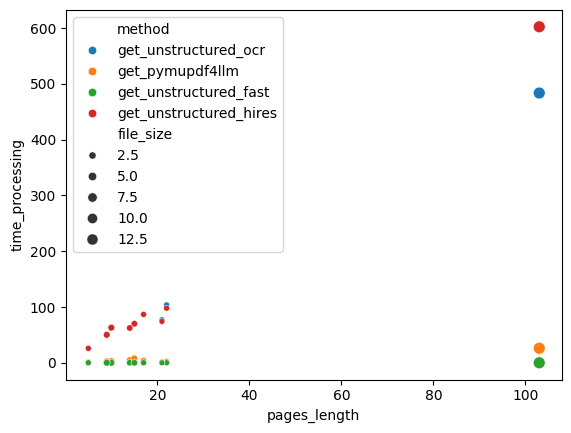

In [27]:
# Print a graph, with file_size on the x-axis and time taken to process the pdf on the y-axis, spliting the data in series by the method used to process the pdf
sns.scatterplot(
    data=df_pdf_processing,
    # x="file_size"
    x="pages_length",
    y="time_processing",
    size="file_size",
    hue="method",
)
plt.show()

# Content Analysis

In [ ]:
##TODO